# Space Launches

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_point
import seaborn as sns
import math
import datetime as dt

The data I selected records every space launch from 1957 to 2020. It includes the name of the company responsible for the launch, the cost of the rocket launched, the location of the launch and the company's country of origin, whether the mission was private or state run, the status of the mission, and a few other descriptive variables. Using this data, I plan on finding different factors that contributed to the success (or failure) of these launches. Success can be measured in different ways. The status of the mission is an obvious metric to use to measure success, but the current status of the rocket and a company's ratio of successful to overall launches are some of several other benchmarks we can use determine success. I look forward to analyzing such relationships between the variables provided in the dataset.

In [2]:
launches = pd.read_csv('Global_Space_Launches.csv')
launches.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50


## Finding the Number of Times Each Country has Succeeded/Failed in its Launches

I started off by plotting the number of times each country has succeeded and failed in terms of mission status, over the 1957-2020 time period. When I was inspecting the 'Status Mission' column of the dataframe, I realized that the number of total Prelaunch Failures and Partial Failures was a small fraction of the number of Successes and Failures. In addition, I chose to make an assumption that we can consider Prelaunch Failures and Partial Failures as just Failures in some sense. Partial Failure or Prelaunch Failure indicate that the mission did not go exactly as planned, and this can be considered as a failure; so I decided to count them as Failure.

['Success' 'Failure' 'Prelaunch Failure' 'Partial Failure']
# of Successes:  3879
# of Failures:  339
# of Prelaunch Failures:  4
# of Partial Failures:  102


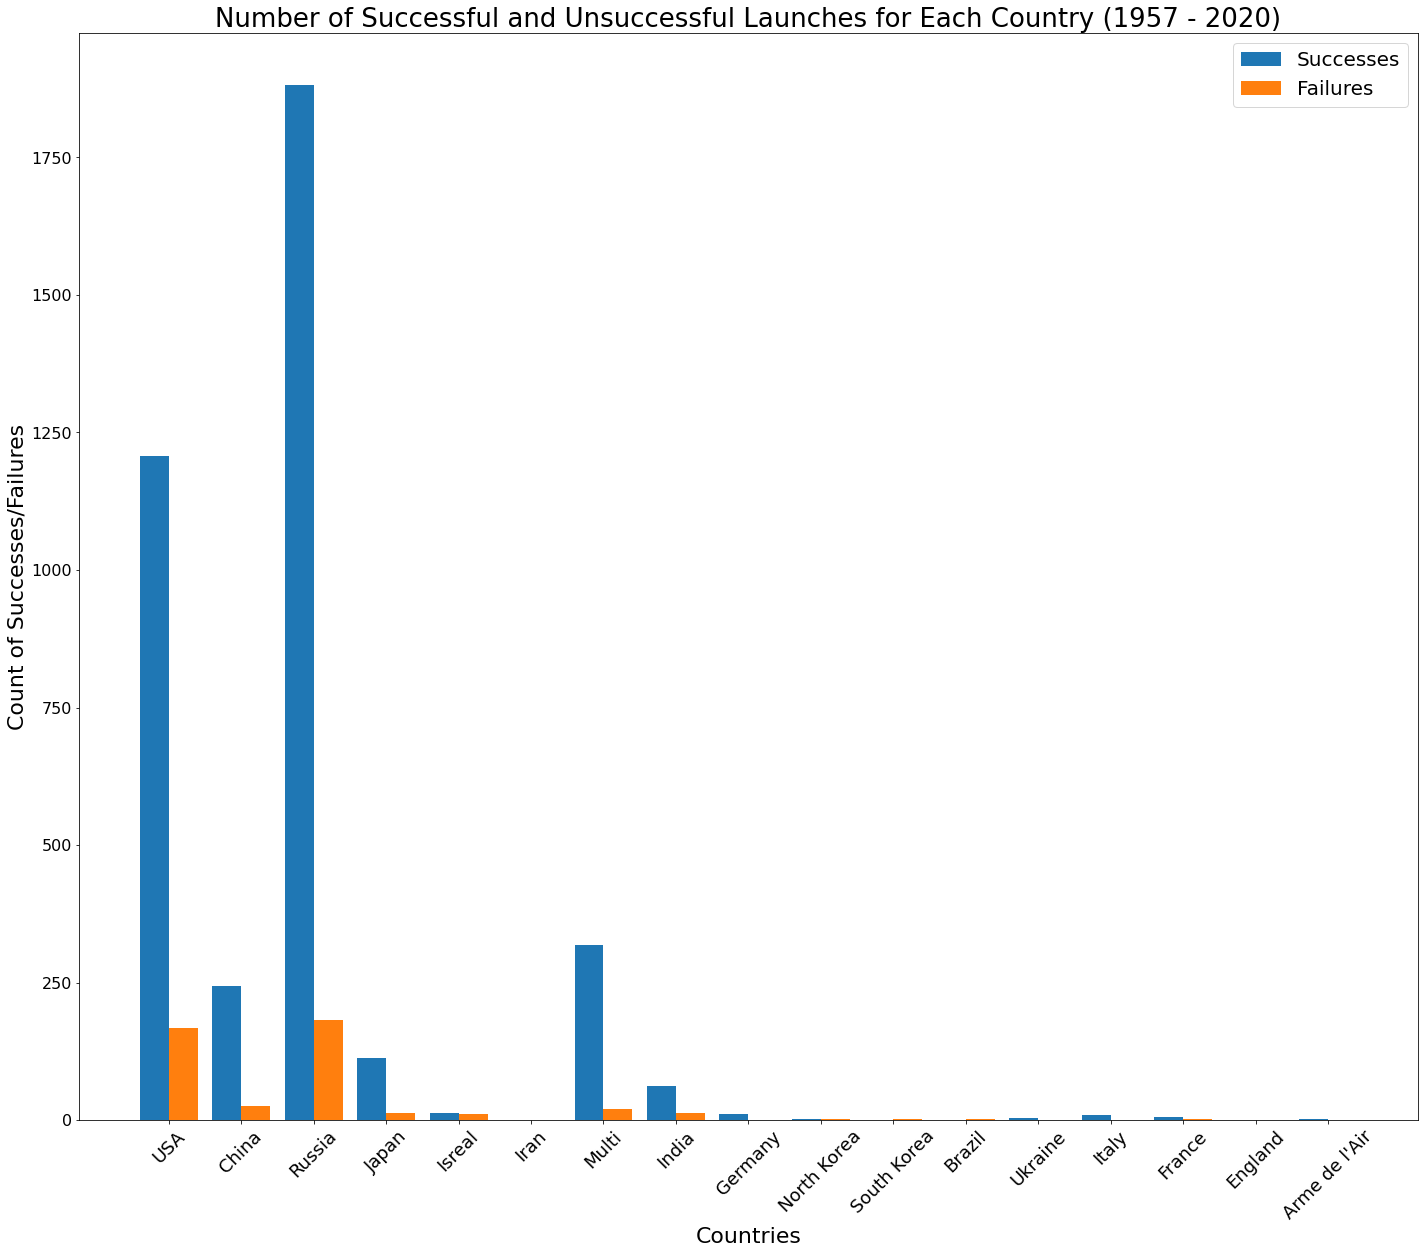

In [3]:
# Plotting the number of times each unique country has succeeded and failed in launches

# We are given that there are 4 categorical variables that respresent 'Status Mission': Success, Failure, Prelaunch Failure, and Partial Failure
print(launches['Status Mission'].unique())

print('# of Successes: ', len(launches[launches['Status Mission'] == 'Success']))
print('# of Failures: ', len(launches[launches['Status Mission'] == 'Failure']))
print('# of Prelaunch Failures: ', len(launches[launches['Status Mission'] == 'Prelaunch Failure']))
print('# of Partial Failures: ', len(launches[launches['Status Mission'] == 'Partial Failure']))

# We can see that there are only four Prelaunch Failures and 102 Partial Failures throughout the entore dataset
# For the sake of this plot, I am going to consider Prelaunch Failures and Partial Failures as pure Failures  

countries = launches['Companys Country of Origin'].unique().tolist()
failure_values = launches['Status Mission'].unique().tolist()
failure_values.remove('Success')

successes = []
failures = []

for country in countries:
    comp_df = launches[launches['Companys Country of Origin'] == country]
    success_count = len(comp_df[comp_df['Status Mission'] == 'Success'])
    failure_count = len(comp_df[comp_df['Status Mission'].isin(failure_values)])
    
    # Makes sure that every launch recorded for a country is classified as either a success or a failure (no missing values)
    if success_count + failure_count != len(comp_df):
        print('Missing values')
        
    successes.append(success_count)
    failures.append(failure_count)
    

X_axis = np.arange(len(countries))
f, ax = plt.subplots(figsize=(24,20))
plt.bar(X_axis - 0.2, successes, 0.4, label = 'Successes')
plt.bar(X_axis + 0.2, failures, 0.4, label = 'Failures')
plt.xticks(X_axis, countries, fontsize=18)
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xlabel("Countries", fontsize=22)
plt.ylabel("Count of Successes/Failures", fontsize=22)
plt.title("Number of Successful and Unsuccessful Launches for Each Country (1957 - 2020)", fontsize=26)
plt.legend()
plt.legend(fontsize=20)
plt.show()

Here we can see that there is a significant disparity between the number of launches some countries have conducteed versus others. It would make sense to somehow normalize this data so that we can more easily compare the success rates of different countries

## Normalizing Success Rate for Countries (based on number of total launches attempted)

In [4]:
# Normalize by finding ratio of success/failures over total launches for each country

success_ratio = []

for i in range(0,len(successes)):
    success_ratio.append(successes[i]/(successes[i] + failures[i]))

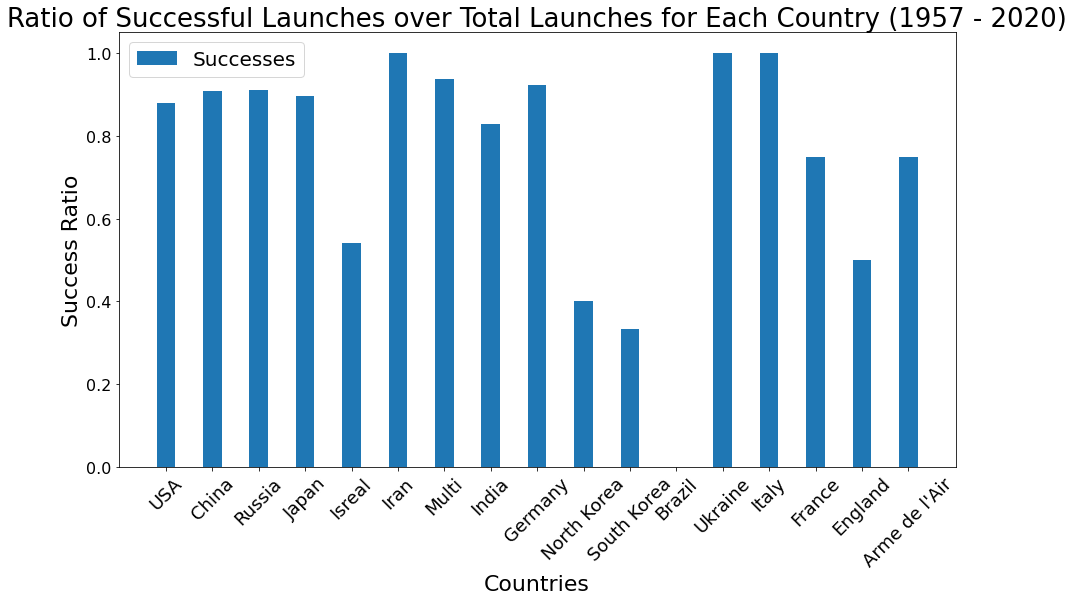

In [5]:
# Now we can plot the normalized ratios of successes to measure the success each country has had with its launches

X_axis = np.arange(len(countries))
f, ax = plt.subplots(figsize=(15,8))
plt.bar(X_axis, success_ratio, 0.4, label = 'Successes')
plt.xticks(X_axis, countries, fontsize=18)
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xlabel("Countries", fontsize=22)
plt.ylabel("Success Ratio", fontsize=22)
plt.title("Ratio of Successful Launches over Total Launches for Each Country (1957 - 2020)", fontsize=26)
plt.legend()
plt.legend(fontsize=20)
plt.show()

While we can compare the success rates between different countries, it doesn't seem like a very solid metric
to solely use against a correlation with success. Especially once you keep in mind that there is a large difference between the number of launches different countries have conducted. For example, it is not entirely reasonable to compare a success ratio in the 0.80s of a country that has had hundreds of launches with a success ratio in the 0.30s of a country with three launches. After having this realization at this step, I decided to explore more variables to find their relationship with success. I started with looking at the cost of the rocket used for each launch.

## Fixing the name of the originally '  Rocket' column and dropping rows in which it has NaN values

In [6]:
# fix ' Rocket' name
# make cols floats

launches.rename(columns = {' Rocket':'Rocket Cost'}, inplace = True)


old_costs = launches['Rocket Cost']
new_costs = []

for i in range(len(old_costs)):
    
    # if nan (all nan have the type float for some reason)
    if isinstance(old_costs[i], float):
        new_costs.append(old_costs[i])
    else:
        curr_cost = old_costs[i].replace(',', '')
        new_costs.append(float(curr_cost))

launches['Rocket Cost'] = new_costs

Text(0.5, 1.0, 'Cost of Rocket Used vs. Status of Mission (1957 - 2020)')

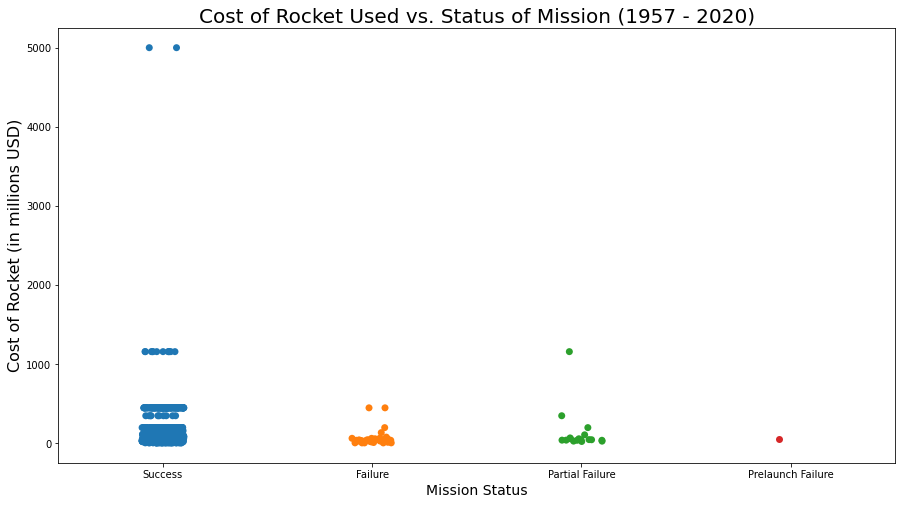

In [7]:
# plt.scatter(launches['Status Mission'], launches[' Rocket'])
# ggplot(launches, aes(y = 'Status Mission', x = ' Rocket')) + geom_point()
rocket_cost_df = launches

mission_status = []
rocket_costs = []

# for the following step
activity_status = []

for index, row in rocket_cost_df.iterrows():
    if not math.isnan(row['Rocket Cost']):
        mission_status.append(row['Status Mission'])
        rocket_costs.append(row['Rocket Cost'])
        activity_status.append(row['Status Rocket'])

f, ax = plt.subplots(figsize=(15,8))
sns.stripplot(ax=ax, x=mission_status, y=rocket_costs, size=7)
ax.set_xlabel("Mission Status", size = 14)
ax.set_ylabel("Cost of Rocket (in millions USD)", size=16)
ax.set_title("Cost of Rocket Used vs. Status of Mission (1957 - 2020)", size=20)

Text(0.5, 1.0, 'Cost of Rocket Used vs. Status of Mission (1957 - 2020)')

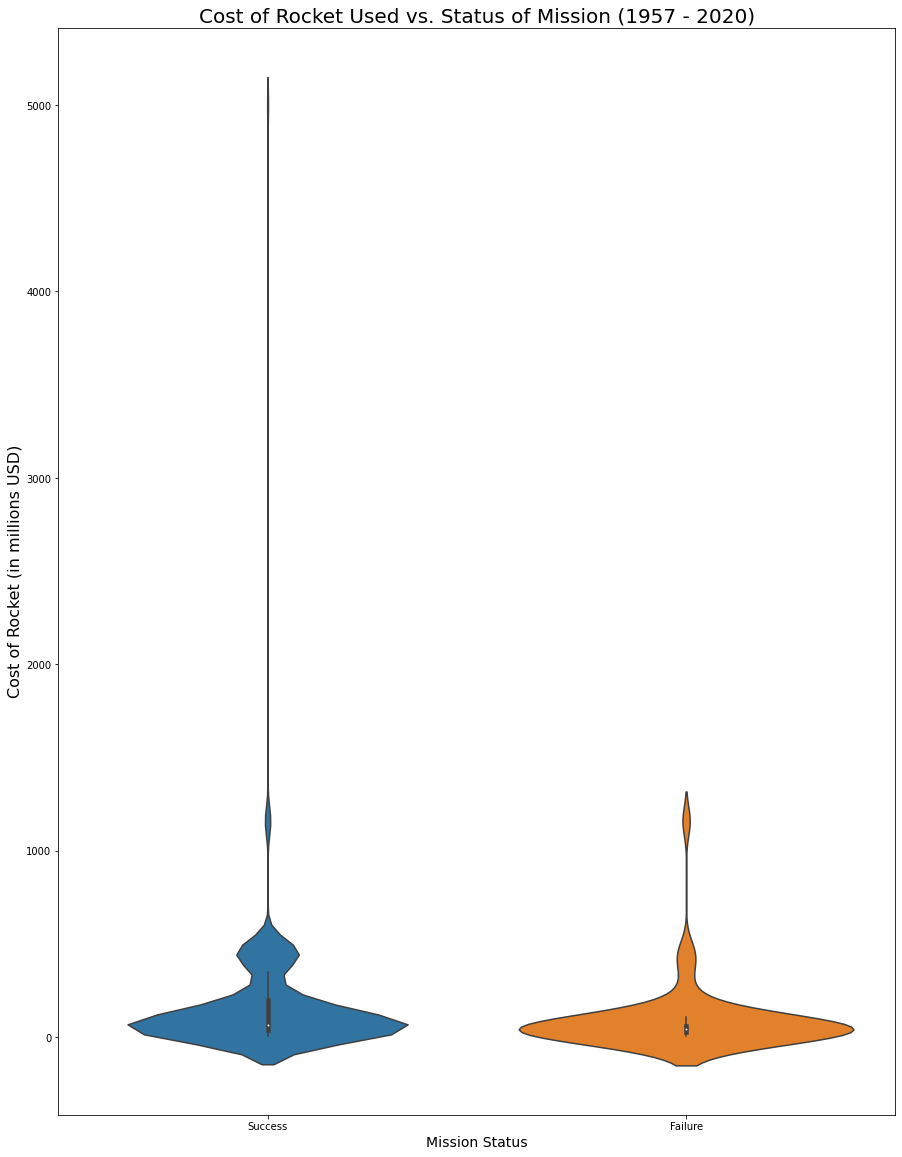

In [8]:
# want to see distribution of rocket cost for both successes and failures (combine all types of failures into one)

for i in range(len(mission_status)):
    if 'Failure' in mission_status[i]:
        mission_status[i] = 'Failure'

f, ax = plt.subplots(figsize=(15,20))
sns.violinplot(x=mission_status, y=rocket_costs)
ax.set_xlabel("Mission Status", size = 14)
ax.set_ylabel("Cost of Rocket (in millions USD)", size=16)
ax.set_title("Cost of Rocket Used vs. Status of Mission (1957 - 2020)", size=20)

Text(0.5, 1.0, 'Cost of Rocket Used vs. Status of Mission (1957 - 2020)')

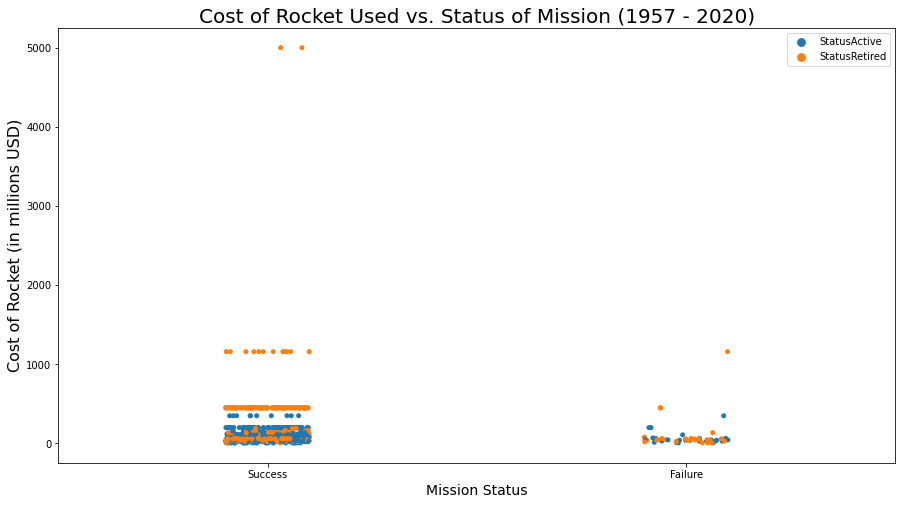

In [9]:
# cost of rocket vs whether it is still active or not
f, ax = plt.subplots(figsize=(15,8))
sns.stripplot(ax=ax, x=mission_status, y=rocket_costs, hue=activity_status)
ax.set_xlabel("Mission Status", size = 14)
ax.set_ylabel("Cost of Rocket (in millions USD)", size=16)
ax.set_title("Cost of Rocket Used vs. Status of Mission (1957 - 2020)", size=20)

In [10]:
# public/private vs. statusActive
# make new df and add col to determine if launch is a success or a failure (just 2 categorical variables instead of 4)



status_binary = []

for index, row in launches.iterrows():
    if 'Failure' in row['Status Mission']:
        status_binary.append('Failure')
    else:
        status_binary.append(row['Status Mission'])
        
launches['S/F'] = status_binary

cross_tab_prop = pd.crosstab(index=launches['Private or State Run'],
                             columns=launches['S/F'],
                             normalize="index")
cross_tab_prop

S/F,Failure,Success
Private or State Run,,
P,0.084709,0.915291
S,0.111566,0.888434


Text(0.5, 1.0, 'Proportion of Failes and Successes for Privately- and State-Run Missions (1957 - 2020)')

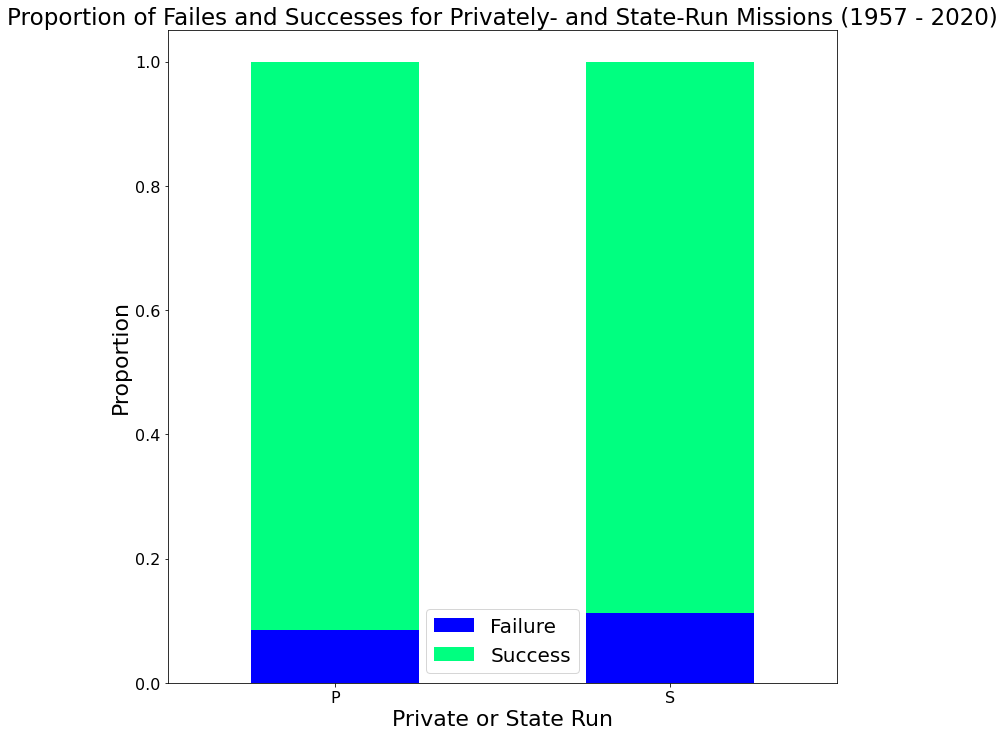

In [11]:
cross_tab_prop.plot(kind='bar', stacked=True, colormap='winter', figsize=(12, 12))
plt.xticks(rotation=0)
plt.legend(loc="upper left", ncol=2)
plt.xlabel("Private or State Run", fontsize=22)
plt.ylabel("Proportion", fontsize=22)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=20)
plt.title("Proportion of Failes and Successes for Privately- and State-Run Missions (1957 - 2020)", fontsize=23)

Years  Private or State Run
1959   P                        1
1960   P                        5
1961   P                        8
1962   P                       14
1963   P                        9
1964   P                       18
1965   P                       22
1966   P                       36
1967   P                       17
1968   P                       10
1969   P                        7
1970   P                        5
1971   P                       10
1972   P                       11
1973   P                       10
1974   P                        7
1975   P                       13
1976   P                       12
1977   P                       13
1978   P                       22
1979   P                        9
1980   P                       12
1981   P                       12
1982   P                        8
1983   P                       10
1984   P                       16
1985   P                       11
1986   P                        9
1987   P            

<AxesSubplot: >

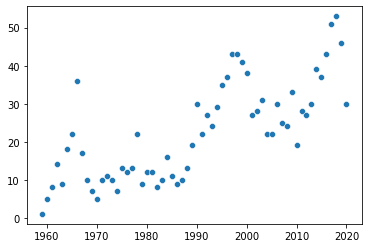

In [19]:
# can see that success is more probable with state run luanches (ever so slightly) --> private stats are pretty close
# to state run stats --> explore if private industry has gotten better over time

# first check for number of launches over time (actually do this in next step, 'we need to normalize')

launches['DateTime'] = pd.to_datetime(launches['DateTime'])
launches['Years'] = launches['DateTime'].dt.year
#print(type(launches['Dates'][0]))
#print(launches[['Private or State Run','Years']].value_counts())



launches_new = launches
launches_new = launches_new[launches_new['Private or State Run'] == 'P']
#launches_new = launches_new[launches_new['Status Mission'] == 'Success']
yearly_privates = launches_new.groupby(['Years', 'Private or State Run']).size()
print(yearly_privates.to_string())

counts = list(yearly_privates)
#print(counts)

years = set()
for index, row in launches.iterrows():
    if row['Private or State Run'] == 'P':
        years.add(row['Years'])

years = list(years)
#print(years)

sns.scatterplot(x=years, y=counts)

In [13]:
launches_new = launches_new[launches_new['Status Mission'] == 'Success']
launches_new = launches_new.groupby(['Private or State Run', 'Years']).size()

print('Privately run successes over the years:')
print(launches_new)

Privately run successes over the years:
Private or State Run  Years
P                     1960      1
                      1961      2
                      1962     10
                      1963      8
                      1964     14
                               ..
                      2016     42
                      2017     50
                      2018     50
                      2019     41
                      2020     28
Length: 61, dtype: int64
